In [1]:
'''
 Load data. Input files defined in yaml files (destest_bpz.yaml, destest_metacal.yaml,destest_gold.yaml)
 It requires destest : 
 https://github.com/des-science/destest
 
 catalogs (to be specified in the yaml files):
 
 Latest version '/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18.h5'
 Latest subsampled version (for quick tests): '/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18_subsampled.h5'
 
 I didn't manage to run the destest Calibrator. This means that if you directly load R1 and R2 from the catalog,
 they are only the respones of the sample and neglect the response of the selection (which is usually few %).
 The solution I got was to load the columns without selection (uncut=True)
 and apply the response and selection by myself.
'''


from multiprocessing import Pool,sharedctypes
from functools import partial
from contextlib import closing


import matplotlib.pyplot as plt
import numpy as np
import pyfits as pf
import healpy as hp
import h5py as h5

import os
import sys

import sys
#sys.path.insert(0, '/global/homes/m/mgatti/Mass_Mapping/systematic_checks/')
sys.path.insert(0, '/global/homes/m/mgatti/Cosmic_Shear/ABE/')
from routines import *
import numpy as np


# ******************************************************************
#                              INPUT
# ******************************************************************
nside = 1024  



# output folders ***************
name_folder_x = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_ABE_mastercat_04_20/final/'

if not os.path.exists(name_folder_x):
    os.mkdir(name_folder_x)

print ("done")

/global/homes/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


done


# collate output          
            

In [44]:
# quick plots *******
path = './dvs'


rrs = ['y1__y1_rho0','y1__y1_rho1','y1__y1_rho2','y1__y1_rho3','y1__y1_rho4','y1__y1_rho5',
       'y3__2ndrun__rho0__2ndrun','y3__2ndrun__rho1__2ndrun','y3__2ndrun__rho2__2ndrun','y3__2ndrun__rho3__2ndrun','y3__2ndrun__rho4__2ndrun','y3__2ndrun__rho5__2ndrun',
       'y3__2ndrun__rho0_sw__2ndrun','y3__2ndrun__rho1_sw__2ndrun','y3__2ndrun__rho2_sw__2ndrun','y3__2ndrun__rho3_sw__2ndrun','y3__2ndrun__rho4_sw__2ndrun','y3__2ndrun__rho5_sw__2ndrun',
      'y3__4thrun__p__4thrun','y3__4thrun__q__4thrun','y3__4thrun__w__4thrun','y3__4thrun__p_sw__4thrun','y3__4thrun__w_sw__4thrun','y3__4thrun__q_sw__4thrun','y3__pshuffle1','y3__qshuffle1',
      'y3__pre','y3__qre','y3__wre',
      'y3__100jk__p__100jk','y3__100jk__q__100jk','y3__100jk__w__100jk',
      'y3__100jk__rho1__100jk','y3__100jk__rho3__100jk','y3__100jk__rho4__100jk',
      'y3__100jk__rho0__100jk','y3__100jk__rho2__100jk','y3__100jk__rho5__100jk']



rho_dict = dict()
rho_dictm = dict()
for hh in range(1):
    ataus = dict()
    for rr in rrs:
        tpv = []
        tmv = []
        tp = []
        tm = []
        
        if 'y1' in rr:
            pathu = path+'/{0}__withweight_nomean_'.format(rr)
        elif '100jk' in rr:
            pathu = path+'/{0}__withweight_nomean_'.format(rr)
        else:
            pathu = path+'/{0}__withweight'.format(rr)
        
        muteaa = load_obj(pathu)
       
        
  
        #path = name_folder_x+"_{0}/y3_sm2__{1}__noweight".format(hh,rr)
        #muteaa = load_obj(path)
        tpv.append(muteaa['high']["xip"])
        tmv.append(muteaa['high']["xim"])
        tp.append(muteaa['high']["corr_jckp"].T)
        tm.append(muteaa['high']["corr_jckm"].T)
        try:
            cc = covariance_jck(muteaa['high']["corr_jckp"].T,1000,'jackknife')
            ccm = covariance_jck(muteaa['high']["corr_jckm"].T,1000,'jackknife')
      
        except:
            cc = covariance_jck(muteaa['high']["corr_jckp"].T,100,'jackknife')
            ccm = covariance_jck(muteaa['high']["corr_jckm"].T,100,'jackknife')
      
        rho_dict[rr] = [muteaa['high']["theta"]*60,np.sqrt(muteaa['high']["xip"]**2),cc['err']]
        rho_dict[rr+"_pv"] = [muteaa['high']["theta"]*60,(muteaa['high']["xip"]),cc['err']]
        rho_dict[rr+"_mv"] = [muteaa['high']["theta"]*60,(muteaa['high']["xim"]),ccm['err']]
        
        ataus[rr+"_pv"]=tpv
        ataus[rr+"_mv"]=tmv
        



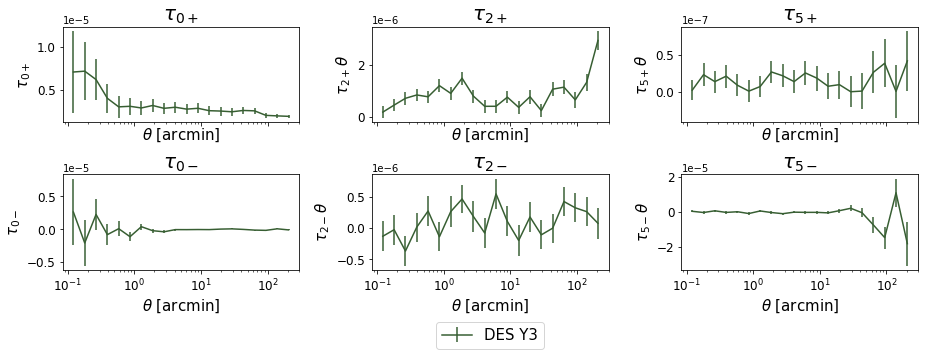

In [45]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

c_2=rgb_to_hex((239, 96, 96))
c_3=rgb_to_hex((55, 94, 50)) 
c_23=rgb_to_hex((121, 183, 179)) 
colors = [c_2,c_3,c_23]



fig, ax = plt.subplots(2,3,sharex = True, figsize=(13,5))




ll = 'y3__4thrun__p__4thrun'
ax[0,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')
ll = 'y3__4thrun__q__4thrun'
ax[0,1].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, label = 'Y3')
ll = 'y3__4thrun__w__4thrun'
ax[0,2].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, label = 'Y3')
ll = 'y3__4thrun__p__4thrun_mv'
ax[1,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')
ll = 'y3__4thrun__q__4thrun_mv'
ax[1,1].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, label = 'DES Y3')
ll = 'y3__4thrun__p__4thrun_mv'
ax[1,2].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, label = 'Y3')




ll = 'y3__p_sw_pv'
ax[0,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, linestyle = 'dashed', label = 'Y3')
ll = 'y3__q_sw_pv'
ax[0,1].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, linestyle = 'dashed',label = 'Y3')
ll = 'y3__w_sw_pv'
ax[0,2].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, linestyle = 'dashed',label = 'Y3')
ll = 'y3__p_sw_mv'
ax[1,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, linestyle = 'dashed',label = 'Y3')
ll = 'y3__q_sw_mv'
ax[1,1].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, linestyle = 'dashed',label = 'DES Y3 star weights')
ll = 'y3__w_sw_mv'
ax[1,2].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, linestyle = 'dashed',label = 'Y3')




ax[0,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,0].set_ylabel(r'$\tau_{0+}$', size = 15)
ax[0,0].set_title(r'$\tau_{0+}$', size = 20)

ax[0,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,1].set_ylabel(r'$\tau_{2+}\theta$', size = 15)
ax[0,1].set_title(r'$\tau_{2+}$', size = 20)

ax[0,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,2].set_ylabel(r'$\tau_{5+}\theta$', size = 15)
ax[0,2].set_title(r'$\tau_{5+}$', size = 20)

ax[1,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,0].set_ylabel(r'$\tau_{0-}$', size = 15)
ax[1,0].set_title(r'$\tau_{0-}$', size = 20)

ax[1,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,1].set_ylabel(r'$\tau_{2-}\theta$', size = 15)
ax[1,1].set_title(r'$\tau_{2-}$', size = 20)

ax[1,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,2].set_ylabel(r'$\tau_{5-}\theta$', size = 15)
ax[1,2].set_title(r'$\tau_{5-}$', size = 20)
#plt.yscale('log')
ax[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[1,1].legend(bbox_to_anchor=(0.5, -0.9),ncol = 2,loc='lower center', fontsize=15)

ax[1,1].tick_params(axis="x", labelsize=12)
ax[1,1].tick_params(axis="y", labelsize=12)
ax[0,1].tick_params(axis="x", labelsize=12)
ax[0,1].tick_params(axis="y", labelsize=12)
ax[1,0].tick_params(axis="x", labelsize=12)
ax[1,0].tick_params(axis="y", labelsize=12)
ax[0,0].tick_params(axis="x", labelsize=12)
ax[0,0].tick_params(axis="y", labelsize=12)
ax[1,2].tick_params(axis="x", labelsize=12)
ax[1,2].tick_params(axis="y", labelsize=12)
ax[0,2].tick_params(axis="x", labelsize=12)
ax[0,2].tick_params(axis="y", labelsize=12)


'''
theta = rho_dict[ll][0]
ax[0,0].plot(theta ,mean_rho_y1['0']*np.ones(len(theta)))
ax[0,1].plot(theta ,mean_rho_y1['1']*np.ones(len(theta)))
ax[0,2].plot(theta ,mean_rho_y1['2']*np.ones(len(theta)))
ax[1,0].plot(theta ,mean_rho_y1['3']*np.ones(len(theta)))
ax[1,1].plot(theta ,mean_rho_y1['4']*np.ones(len(theta)))
ax[1,2].plot(theta ,mean_rho_y1['5']*np.ones(len(theta)))

'''
plt.xscale('log')
plt.tight_layout()
plt.savefig('taus.pdf',bbox_inches='tight')
plt.show()



In [50]:
dict_save=dict()

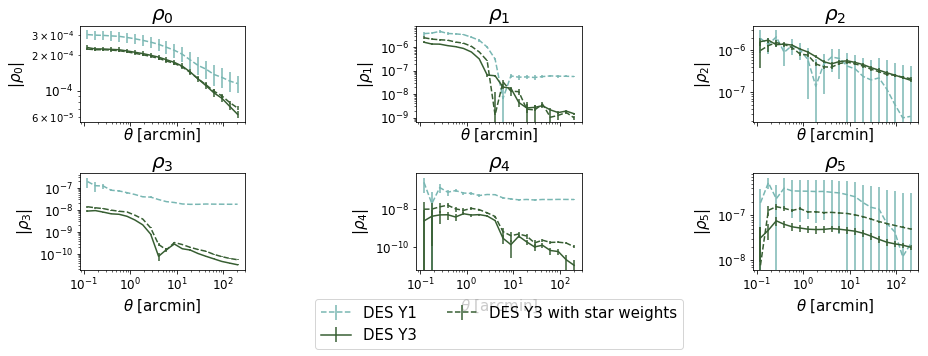

In [51]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

c_2=rgb_to_hex((239, 96, 96))
c_3=rgb_to_hex((55, 94, 50)) 
c_23=rgb_to_hex((121, 183, 179)) 
colors = [c_2,c_3,c_23]



fig, ax = plt.subplots(2,3,sharex = True, figsize=(13,5))

ll = 'y1__y1_rho0'
dict_save['y1_rho0']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[0,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_23, linestyle = 'dashed',label = 'Y1')

ll = 'y1__y1_rho1'
dict_save['y1_rho1']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[0,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_23, linestyle = 'dashed',label = 'Y1')

ll = 'y1__y1_rho2'
dict_save['y1_rho2']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[0,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_23, linestyle = 'dashed',label = 'Y1')

ll = 'y1__y1_rho3'
dict_save['y1_rho3']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[1,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_23, linestyle = 'dashed',label = 'Y1')

ll = 'y1__y1_rho4'
dict_save['y1_rho4']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[1,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_23, linestyle = 'dashed',label = 'DES Y1')

ll = 'y1__y1_rho5'
dict_save['y1_rho5']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[1,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_23, linestyle = 'dashed',label = 'Y1')




ll = 'y3__2ndrun__rho0__2ndrun'
dict_save['y3_rho0']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[0,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')

ll = 'y3__2ndrun__rho1__2ndrun'
dict_save['y3_rho1']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[0,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')

ll = 'y3__2ndrun__rho2__2ndrun'
dict_save['y3_rho2']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[0,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')

ll = 'y3__2ndrun__rho3__2ndrun'
dict_save['y3_rho3']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[1,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')

ll = 'y3__2ndrun__rho4__2ndrun'
dict_save['y3_rho4']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[1,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'DES Y3')

ll = 'y3__2ndrun__rho5__2ndrun'
dict_save['y3_rho5']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[1,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')





ll = 'y3__2ndrun__rho0_sw__2ndrun'
dict_save['y3_sw_rho0']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[0,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')

ll = 'y3__2ndrun__rho1_sw__2ndrun'
dict_save['y3_sw_rho1']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[0,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')

ll = 'y3__2ndrun__rho2_sw__2ndrun'
dict_save['y3_sw_rho2']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[0,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')

ll = 'y3__2ndrun__rho3_sw__2ndrun'
dict_save['y3_sw_rho3']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[1,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')

ll = 'y3__2ndrun__rho4_sw__2ndrun'
dict_save['y3_sw_rho4']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[1,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'DES Y3 with star weights')

ll = 'y3__2ndrun__rho5_sw__2ndrun'
dict_save['y3_sw_rho5']=rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2]
ax[1,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')

'''
ll = 'y3__100jk__rho0__100jk'
ax[0,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')
ll = 'y3__100jk__rho1__100jk'
ax[0,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')
ll = 'y3__100jk__rho2__100jk'
ax[0,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')
ll = 'y3__100jk__rho3__100jk'
ax[1,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')
ll = 'y3__100jk__rho4__100jk'
ax[1,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'DES Y3 no mean')
ll = 'y3__100jk__rho5__100jk'
ax[1,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')
'''


'''

'''


ax[0,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,0].set_ylabel(r'|$\rho_0$|', size = 15)
ax[0,0].set_title(r'$\rho_0$', size = 20)

ax[0,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,1].set_ylabel(r'|$\rho_1$|', size = 15)
ax[0,1].set_title(r'$\rho_1$', size = 20)

ax[0,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,2].set_ylabel(r'|$\rho_2$|', size = 15)
ax[0,2].set_title(r'$\rho_2$', size = 20)

ax[1,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,0].set_ylabel(r'|$\rho_3$|', size = 15)
ax[1,0].set_title(r'$\rho_3$', size = 20)

ax[1,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,1].set_ylabel(r'|$\rho_4$|', size = 15)
ax[1,1].set_title(r'$\rho_4$', size = 20)

ax[1,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,2].set_ylabel(r'$|\rho_5$|', size = 15)
ax[1,2].set_title(r'$\rho_5$', size = 20)
#plt.yscale('log')
ax[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[1,1].legend(bbox_to_anchor=(0.5, -0.9),ncol = 2,loc='lower center', fontsize=15)

ax[1,1].tick_params(axis="x", labelsize=12)
ax[1,1].tick_params(axis="y", labelsize=12)
ax[0,1].tick_params(axis="x", labelsize=12)
ax[0,1].tick_params(axis="y", labelsize=12)
ax[1,0].tick_params(axis="x", labelsize=12)
ax[1,0].tick_params(axis="y", labelsize=12)
ax[0,0].tick_params(axis="x", labelsize=12)
ax[0,0].tick_params(axis="y", labelsize=12)
ax[1,2].tick_params(axis="x", labelsize=12)
ax[1,2].tick_params(axis="y", labelsize=12)
ax[0,2].tick_params(axis="x", labelsize=12)
ax[0,2].tick_params(axis="y", labelsize=12)

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[0,2].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[1,2].set_yscale('log')



'''
theta = rho_dict[ll][0]
ax[0,0].plot(theta ,mean_rho_y1['0']*np.ones(len(theta)))
ax[0,1].plot(theta ,mean_rho_y1['1']*np.ones(len(theta)))
ax[0,2].plot(theta ,mean_rho_y1['2']*np.ones(len(theta)))
ax[1,0].plot(theta ,mean_rho_y1['3']*np.ones(len(theta)))
ax[1,1].plot(theta ,mean_rho_y1['4']*np.ones(len(theta)))
ax[1,2].plot(theta ,mean_rho_y1['5']*np.ones(len(theta)))

'''
plt.tight_layout()
plt.xscale('log')
plt.savefig('rho_stats.pdf',bbox_inches='tight')
plt.show()



# Load TAU from FLASK

In [109]:
path_flask = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_ABE_mastercat_4_20_FLASK/final/'
xx = 1
rrs=["p_sw","q_sw","w_sw"]
rrsF=["p","q","w"]
#r = load_obj(name_folder_x+"/response")

#R = [0.5*(r[0][0]+r[0][1]),0.5*(r[1][0]+r[1][1]),0.5*(r[2][0]+r[2][1]),0.5*(r[3][0]+r[3][1])]

Ataus100=dict()
nrel = 300
#for hh in range(zbins):
if 1==1:
    hh=0
    ataus_FLASK = dict()
    for hg,rr in enumerate(rrs):
        tpv = []
        tmv = []
        tp = []
        tm = []

        for jk in range(nrel):
            path=path_flask +"_{0}/y3_sm2__{1}_FLASKw_{2}__withweight".format(hh,rrsF[hg],jk)
            muteaa = load_obj(path)
            tpv.append(muteaa['high']["xip"])#/R[hh])
            tmv.append(muteaa['high']["xim"])#/R[hh])
        ataus_FLASK[rrsF[hg]+"_pv"]=covariance_jck(np.array(tpv).T,nrel,'bootstrap')
        ataus_FLASK[rrsF[hg]+"_mv"]=covariance_jck(np.array(tmv).T,nrel,'bootstrap')
                                             
    hh=0
    #ataus = dict()
    for rr in rrs:
        tpv = []
        tmv = []
        tp = []
        tm = []

        path='./dvs/y3__{0}__withweight'.format(rr)
        #path=''
        path='./dvs/y3__100jk__{0}__100jk__withweight_nomean_'.format(rr)
        #path=path_flask +"_{0}/y3_sm2__{1}_FLASK_{2}__withweight".format(hh,rr,250)
            
        muteaa = load_obj(path)
        tpv.append(muteaa['high']["xip"])#/R[hh])
        tmv.append(muteaa['high']["xim"])#/R[hh])
        tp.append(muteaa['high']["corr_jckp"].T)#/R[hh])
        tm.append(muteaa['high']["corr_jckm"].T)#/R[hh])
        try:
            ataus[rr+"_pv"]=covariance_jck(np.array(tp)[0],1000,'jackknife')
            ataus[rr+"_mv"]=covariance_jck(np.array(tm)[0],1000,'jackknife')
        except:
            print(100)
            Ataus100[rr+"_pv"]=covariance_jck(np.array(tp)[0],100,'jackknife')
            Ataus100[rr+"_mv"]=covariance_jck(np.array(tm)[0],100,'jackknife')
         
                    

100
100
100


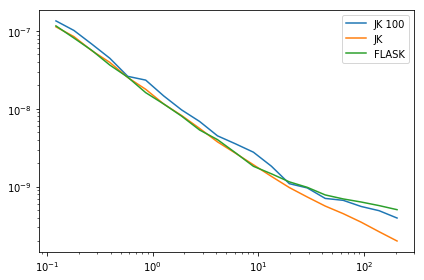

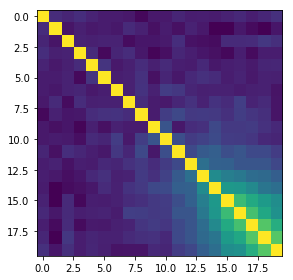

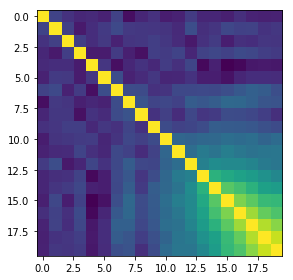

In [114]:
rr = 'w'
rra = 'w_sw'
rrf = 'w'
ll = 'y3__rho0'
plt.plot(rho_dict[ll][0],Ataus100[rra+"_pv"]['err'], label = 'JK 100')
plt.plot(rho_dict[ll][0],ataus[rr+"_pv"]['err'], label = 'JK')
plt.plot(rho_dict[ll][0],ataus_FLASK[rrf+"_pv"]['err'], label = 'FLASK')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()
plt.imshow(ataus[rr+"_pv"]['corr'])
plt.show()
plt.imshow(ataus_FLASK[rrf+"_pv"]['corr'])

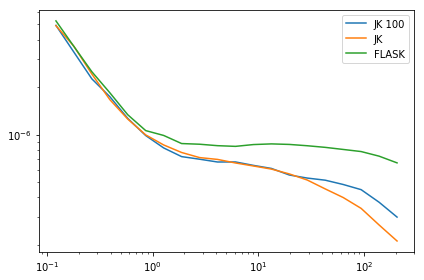

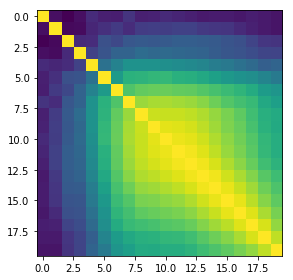

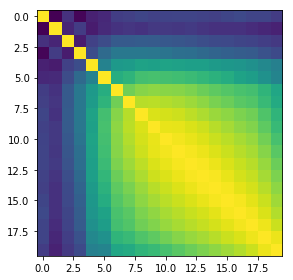

In [99]:
rr = 'p'
rrf = 'p'
ll = 'y3__rho0'
plt.plot(rho_dict[ll][0],Ataus100[rr+"_pv"]['err'], label = 'JK 100')
plt.plot(rho_dict[ll][0],ataus[rr+"_pv"]['err'], label = 'JK')
plt.plot(rho_dict[ll][0],ataus_FLASK[rrf+"_pv"]['err'], label = 'FLASK')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()
plt.imshow(ataus[rr+"_pv"]['corr'])
plt.show()
plt.imshow(ataus_FLASK[rrf+"_pv"]['corr'])


['w_pv', 'w_mv']

# save TAU

In [21]:
xx = 1
path_flask = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_ABE_mastercat_4_20_FLASK/final/'
Arrs=["p","q","w"]

FLASK = False
SW = True

if SW :
    rrs=["p_sw","q_sw","w_sw"]
    
else:
    rrs=["p","q","w"]

rrsF=["p","q","w"]
hh=0
nrel=300
ataus = dict()
for hg,rr in enumerate(rrs):
    tpv = []
    tmv = []
    tp = []
    tm = []



    # NO mean subtraction
    pathu = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_ABE_mastercat_04_20/final/_0/y3__4thrun__{0}__4thrun__withweight'.format(rr)
    muteaa = load_obj(pathu)
    tpv.append(muteaa['high']["xip"])#/R[hh])
    tmv.append(muteaa['high']["xim"])#/R[hh])
    tp.append(muteaa['high']["corr_jckp"].T)#/R[hh])
    tm.append(muteaa['high']["corr_jckm"].T)#/R[hh])
    ataus[Arrs[hg]+"_p"]=tp
    ataus[Arrs[hg]+"_m"]=tm     

    ataus[Arrs[hg]+"_pv"]=tpv
    ataus[Arrs[hg]+"_mv"]=tmv

    # FLASK ****************
    if FLASK:
        jhp = []
        jhm = []
        for jk in range(nrel):
            path=path_flask +"_{0}/y3_sm2__{1}_FLASKw_{2}__withweight".format(hh,rrsF[hg],jk)
            muteaa = load_obj(path)
            jhp.append(muteaa['high']["xip"])#/R[hh])
            jhm.append(muteaa['high']["xim"])#/R[hh]
        ataus[Arrs[hg]+"_p"]=np.array(jhp).T
        ataus[Arrs[hg]+"_m"]=np.array(jhm).T

for key in ataus.keys():
    try:
        #

        #FLASK
        if FLASK:
            ataus[key] = np.array(ataus[key]).reshape(20*xx,nrel)
            woa = covariance_jck(ataus[key],nrel,"bootstrap")
        else:
            ataus[key] = np.array(ataus[key]).reshape(20*xx,1000)
            woa = covariance_jck(ataus[key],1000,"jackknife")

        #taus[key+"_cov"]=woa["cov"]
    except:
        ataus[key] = np.array(ataus[key]).reshape(20*xx)



entries=['p_p','p_m','q_p','q_m','w_p','w_m']
t = []
if FLASK:
    for entr in entries:
        t.append(np.array(ataus[entr]).reshape(20*xx,300))
    t = np.array(t).reshape(6*np.array(t).shape[1],300)
    woa = covariance_jck(t,300,"bootstrap")      
else:
    for entr in entries:
        t.append(np.array(ataus[entr]).reshape(20*xx,1000))
    t = np.array(t).reshape(6*np.array(t).shape[1],1000)
    woa = covariance_jck(t,1000,"jackknife")


from astropy.io import fits
tau0marr = ataus["p_mv"]; tau2marr = ataus["q_mv"];  tau5marr = ataus["w_mv"];
tau0parr = ataus["p_pv"]; tau2parr = ataus["q_pv"];  tau5parr = ataus["w_pv"];
taus = [tau0parr, tau0marr, tau2parr, tau2marr, tau5parr, tau5marr]
taus_names = ['TAU0P', 'TAU0M','TAU2P','TAU2M', 'TAU5P', 'TAU5M']
##Format of the fit file output



names=['BIN1', 'BIN2','ANGBIN', 'VALUE', 'ANG']
forms = ['i4', 'i4', 'i4',  'f4',  'f4']
dtype = dict(names = names, formats=forms)
nrows = len(tau0marr)
outdata = np.recarray((nrows, ), dtype=dtype)
covmat = woa["cov"]
hdu = fits.PrimaryHDU()
hdul = fits.HDUList([hdu])
covmathdu = fits.ImageHDU(covmat, name='COVMAT')
hdul.insert(1, covmathdu)
zbin=1
bin1array = np.array([ zbin]*nrows)
bin2array = np.array([ -999]*nrows)
angbinarray = np.arange(nrows)


angarray = np.array([muteaa['high']["theta"]*60.]*xx).reshape(xx*20)
for j, nam in enumerate(taus_names):
   outdata = np.recarray((nrows, ), dtype=dtype)
   array_list = [bin1array, bin2array, angbinarray,np.array(taus[j]),  angarray ]
   for array, name in zip(array_list, names): outdata[name] = array

   corrhdu = fits.BinTableHDU(outdata, name=nam)
   hdul.insert(j+2, corrhdu)
hdul[1].header['COVDATA'] = True
hdul[1].header['EXTNAME'] =  'COVMAT'
hdul[1].header['NAME_0'] =  'TAU0'
hdul[1].header['STRT_0'] =  0
hdul[1].header['LEN_0'] = nrows
hdul[1].header['NAME_1'] =  'TAU2'
hdul[1].header['STRT_1'] =  nrows
hdul[1].header['LEN_1'] = nrows
hdul[1].header['NAME_2'] =  'TAU5'
hdul[1].header['STRT_2'] =  2*nrows
hdul[1].header['LEN_2'] = nrows
hdul[2].header['QUANT1'] = 'GeR'; hdul[3].header['QUANT1'] = 'GeR'
hdul[2].header['QUANT2'] = 'PeR'; hdul[3].header['QUANT2'] = 'PeR'
hdul[4].header['QUANT1'] = 'GeR'; hdul[5].header['QUANT1'] = 'GeR'
hdul[4].header['QUANT2'] = 'PqR'; hdul[5].header['QUANT2'] = 'PqR'
hdul[6].header['QUANT1'] = 'GeR'; hdul[7].header['QUANT1'] = 'GeR'
hdul[6].header['QUANT2'] = 'PwR'; hdul[7].header['QUANT2'] = 'PwR'

if SW:
    sw_label = '_sw_'
else:
    sw_label = ''
if FLASK:

    if os.path.exists("./dvs/" + 'tau_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label)):
        os.remove("./dvs/"+ 'tau_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label))
    outname = os.path.join("./dvs/", 'tau_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label))
    hdul.writeto(outname, overwrite=True)

else:
    if os.path.exists("./dvs/" + 'tau_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label)):
        os.remove("./dvs/"+ 'tau_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label))
    outname = os.path.join("./dvs/", 'tau_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label))
    hdul.writeto(outname, overwrite=True)
    
print ("done")

done


In [36]:
FLASK = False
SW = True
nomean = False
if SW:
    rrs=["rho0_sw","rho1_sw","rho2_sw","rho3_sw","rho4_sw","rho5_sw"]
else:
    rrs=["rho0","rho1","rho2","rho3","rho4","rho5"]
    
if nomean:
    njck=100
    rrs=["y3__100jk__rho0__100jk","y3__100jk__rho1__100jk","y3__100jk__rho2__100jk","y3__100jk__rho3__100jk","y3__100jk__rho4__100jk","y3__100jk__rho5__100jk"]
else:
    njck=1000
    
    
Arrs=["rho0","rho1","rho2","rho3","rho4","rho5"] 
hh=0
ataus = dict()
for hg,rr in enumerate(rrs):
    tpv = []
    tmv = []
    tp = []
    tm = []

    if nomean:
        pathu = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_ABE_mastercat_04_20/final/_0/y3__2ndrun__{0}__2ndrun__withweight_nomean_'.format(rr)
    else:
        pathu = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_ABE_mastercat_04_20/final/_0/y3__2ndrun__{0}__2ndrun__withweight'.format(rr)
    muteaa = load_obj(pathu)
    tpv.append(muteaa['high']["xip"])#/R[hh])
    tmv.append(muteaa['high']["xim"])#/R[hh])
    tp.append(muteaa['high']["corr_jckp"].T)#/R[hh])
    tm.append(muteaa['high']["corr_jckm"].T)#/R[hh])
    ataus[Arrs[hg]+"_pv"]=tpv
    ataus[Arrs[hg]+"_mv"]=tmv
    ataus[Arrs[hg]+"_p"]=tp
    ataus[Arrs[hg]+"_m"]=tm
for key in ataus.keys():
    try:
        ataus[key] = np.array(ataus[key]).reshape(20*xx,njck)
        woa = covariance_jck(ataus[key],njck,"jackknife")
        #taus[key+"_cov"]=woa["cov"]
    except:
        ataus[key] = np.array(ataus[key]).reshape(20*xx)
entries=["rho0_p","rho0_m","rho1_p","rho1_m","rho2_p","rho2_m","rho3_p","rho3_m","rho4_p","rho4_m","rho5_p","rho5_m"]











t = []
for entr in entries:
    t.append(np.array(ataus[entr]).reshape(20*xx,njck))
t = np.array(t).reshape(12*np.array(t).shape[1],njck)
woa = covariance_jck(t,njck,"jackknife")


from astropy.io import fits

taus = [ataus["rho0_pv"], ataus["rho0_mv"], ataus["rho1_pv"],ataus["rho1_mv"],ataus["rho2_pv"],ataus["rho2_mv"],ataus["rho3_pv"],ataus["rho3_mv"],ataus["rho4_pv"],ataus["rho4_mv"],ataus["rho5_pv"],ataus["rho5_mv"]]
taus_names = ['RHO0P', 'RHO0M','RHO1P','RHO1M','RHO2P','RHO2M','RHO3P','RHO3M', 'RHO4P','RHO4M', 'RHO5P', 'RHO5M']
##Format of the fit file output



names=['BIN1', 'BIN2','ANGBIN', 'VALUE', 'ANG']
forms = ['i4', 'i4', 'i4',  'f4',  'f4']
dtype = dict(names = names, formats=forms)
nrows = len(ataus["rho0_pv"])
outdata = np.recarray((nrows, ), dtype=dtype)
covmat = woa["cov"]
hdu = fits.PrimaryHDU()
hdul = fits.HDUList([hdu])
covmathdu = fits.ImageHDU(covmat, name='COVMAT')
hdul.insert(1, covmathdu)
zbin=1
bin1array = np.array([ zbin]*nrows)
bin2array = np.array([ -999]*nrows)
angbinarray = np.arange(nrows)


angarray = np.array([muteaa['high']["theta"]*60.]*xx).reshape(xx*20)
for j, nam in enumerate(taus_names):
   outdata = np.recarray((nrows, ), dtype=dtype)
   array_list = [bin1array, bin2array, angbinarray,np.array(taus[j]),  angarray ]
   for array, name in zip(array_list, names): outdata[name] = array

   corrhdu = fits.BinTableHDU(outdata, name=nam)
   hdul.insert(j+2, corrhdu)
hdul[1].header['COVDATA'] = True
hdul[1].header['EXTNAME'] =  'COVMAT'
hdul[1].header['NAME_0'] =  'RHO0'
hdul[1].header['STRT_0'] =  0
hdul[1].header['LEN_0'] = nrows
hdul[1].header['NAME_1'] =  'RHO1'
hdul[1].header['STRT_1'] =  nrows
hdul[1].header['LEN_1'] = nrows
hdul[1].header['NAME_2'] =  'RHO2'
hdul[1].header['STRT_2'] =  2*nrows
hdul[1].header['LEN_2'] = nrows
hdul[1].header['NAME_3'] =  'RHO3'
hdul[1].header['STRT_3'] =  3*nrows
hdul[1].header['LEN_3'] = nrows
hdul[1].header['NAME_4'] =  'RHO4'
hdul[1].header['STRT_4'] =  4*nrows
hdul[1].header['LEN_4'] = nrows
hdul[1].header['NAME_5'] =  'RHO5'
hdul[1].header['STRT_5'] =  5*nrows
hdul[1].header['LEN_5'] = nrows
hdul[2].header['QUANT1'] = 'GeR'; hdul[3].header['QUANT1'] = 'GeR'
hdul[2].header['QUANT2'] = 'PeR'; hdul[3].header['QUANT2'] = 'PeR'
hdul[4].header['QUANT1'] = 'GeR'; hdul[5].header['QUANT1'] = 'GeR'
hdul[4].header['QUANT2'] = 'PqR'; hdul[5].header['QUANT2'] = 'PqR'
hdul[6].header['QUANT1'] = 'GeR'; hdul[7].header['QUANT1'] = 'GeR'
hdul[6].header['QUANT2'] = 'PwR'; hdul[7].header['QUANT2'] = 'PwR'


    
if SW:
    sw_label = '_sw_'
else:
    sw_label = ''
    
    
if nomean:
    sw_label = 'nomean'
    if os.path.exists("./dvs/" + 'rho_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label)):
            os.remove("./dvs/"+ 'rho_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label))
    outname = os.path.join("./dvs/", 'rho_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label))
    hdul.writeto(outname, overwrite=True)

else:
    if FLASK:

        if os.path.exists("./dvs/" + 'rho_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label)):
            os.remove("./dvs/"+ 'rho_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label))
        outname = os.path.join("./dvs/", 'rho_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label))
        hdul.writeto(outname, overwrite=True)

    else:
        if os.path.exists("./dvs/" + 'rho_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label)):
            os.remove("./dvs/"+ 'rho_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label))
        outname = os.path.join("./dvs/", 'rho_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label))
        hdul.writeto(outname, overwrite=True)

print ("done")

done


# mcmc and best fits ********************

In [24]:
def read_rhos(stat_file, minscale=None, maxscale=None, minbin=None, maxbin=None):
    import numpy as np
    import fitsio
    print("Trying to Read", stat_file)
    covmat=  fitsio.read(stat_file, ext=1)
    RHO0P =  fitsio.read(stat_file, ext=2); rho0p =  RHO0P['VALUE']
    RHO0M =  fitsio.read(stat_file, ext=3); rho0m =  RHO0M['VALUE']
    RHO1P =  fitsio.read(stat_file, ext=4); rho1p =  RHO1P['VALUE']
    RHO1M =  fitsio.read(stat_file, ext=5); rho1m =  RHO1M['VALUE']
    RHO2P =  fitsio.read(stat_file, ext=6); rho2p =  RHO2P['VALUE']
    RHO2M =  fitsio.read(stat_file, ext=7); rho2m =  RHO2M['VALUE']
    RHO3P =  fitsio.read(stat_file, ext=8); rho3p =  RHO3P['VALUE']
    RHO3M =  fitsio.read(stat_file, ext=9); rho3m =  RHO3M['VALUE']
    RHO4P =  fitsio.read(stat_file, ext=10); rho4p =  RHO4P['VALUE']
    RHO4M =  fitsio.read(stat_file, ext=11); rho4m =  RHO4M['VALUE']
    RHO5P =  fitsio.read(stat_file, ext=12); rho5p =  RHO5P['VALUE']
    RHO5M =  fitsio.read(stat_file, ext=13); rho5m =  RHO5M['VALUE']

    meanr = RHO0P['ANG']
    rhos = [rho0p, rho0m, rho1p, rho1m, rho2p, rho2m, rho3p, rho3m,
            rho4p, rho4m, rho5p, rho5m]
    nrhos = len(rhos)
    print(stat_file, "Format seems OK")
    if maxscale is not None and maxbin is None:
        meanr = meanr[meanr<maxscale]
        idx = int(len(meanr))
        ind =  np.arange(idx); size = int(len(covmat)/nrhos)
        indxs = np.concatenate([ind + i*size for i in range(nrhos) ] )
        covmat = covmat[indxs,: ][:,indxs]
        for i in range(len(rhos)):
            rhos[i] = rhos[i][:idx]
    if minscale is not None and minbin is None:
        idx = len(meanr[meanr<minscale])
        meanr = meanr[idx:]
        ind =  np.arange(idx, idx + len(meanr)); size = int(len(covmat)/nrhos)
        indxs = np.concatenate([ind + i*size for i in range(nrhos) ] )
        covmat = covmat[indxs,: ][:,indxs]
        for i in range(len(rhos)):
            rhos[i] = rhos[i][idx:]
    if minbin is not None:
        idx = minbin
        meanr = meanr[idx:]
        ind =  np.arange(idx, idx + len(meanr)); size = int(len(covmat)/nrhos)
        indxs = np.concatenate([ind + i*size for i in range(nrhos) ] )
        covmat = covmat[indxs,: ][:,indxs]
        for i in range(len(rhos)):
            rhos[i] = rhos[i][idx:]
    if maxbin is not None:
        idx = maxbin
        meanr = meanr[:idx]
        ind =  np.arange(idx); size = int(len(covmat)/nrhos)
        indxs = np.concatenate([ind + i*size for i in range(nrhos) ] )
        covmat = covmat[indxs,: ][:,indxs]
        for i in range(len(rhos)):
            rhos[i] = rhos[i][:idx]
        
    return  meanr, rhos,  covmat


def read_taus(stat_file, minscale=None, maxscale=None, minbin=None, maxbin=None):
    import numpy as np
    import fitsio
    #print("Trying to Read", stat_file)
    covmat =  fitsio.read(stat_file, ext=1)
    TAU0P =  fitsio.read(stat_file, ext=2); tau0p =  TAU0P['VALUE']
    TAU0M =  fitsio.read(stat_file, ext=3); tau0m =  TAU0M['VALUE']
    TAU2P =  fitsio.read(stat_file, ext=4); tau2p =  TAU2P['VALUE']
    TAU2M =  fitsio.read(stat_file, ext=5); tau2m =  TAU2M['VALUE']
    TAU5P =  fitsio.read(stat_file, ext=6); tau5p =  TAU5P['VALUE']
    TAU5M =  fitsio.read(stat_file, ext=7); tau5m =  TAU5M['VALUE']
    
    meanr = TAU0P['ANG']
    taus = [tau0p, tau0m, tau2p, tau2m, tau5p, tau5m]
    ntaus = len(taus)
    #print(stat_file, "Format seems OK")
    if maxscale is not None:
        meanr = meanr[meanr<maxscale]
        idx = len(meanr)
        ind =  np.arange(idx); size = int(len(covmat)/ntaus)
        indxs = np.concatenate([ind + i*size for i in range(ntaus) ] )
        covmat = covmat[indxs,: ][:,indxs]   
        for i in range(len(taus)):
            taus[i] = taus[i][:idx]

    if minscale is not None:
        idx = len(meanr[meanr<minscale])
        meanr = meanr[idx:]
        ind =  np.arange(idx, idx + len(meanr)); size = int(len(covmat)/ntaus)
        indxs = np.concatenate([ind + i*size for i in range(ntaus) ] )
        covmat = covmat[indxs,: ][:,indxs]   
        for i in range(len(taus)):
            taus[i] = taus[i][idx:]

    if minbin is not None:
        idx = minbin
        meanr = meanr[idx:]
        ind =  np.arange(idx, idx + len(meanr)); size = int(len(covmat)/ntaus)
        indxs = np.concatenate([ind + i*size for i in range(ntaus) ] )
        covmat = covmat[indxs,: ][:,indxs]
        for i in range(ntaus):
            taus[i] = taus[i][idx:]

    if maxbin is not None:
        idx = maxbin
        meanr = meanr[:idx]
        ind =  np.arange(idx); size = int(len(covmat)/ntaus)
        indxs = np.concatenate([ind + i*size for i in range(ntaus) ] )
        covmat = covmat[indxs,: ][:,indxs]
        for i in range(ntaus):
            taus[i] = taus[i][:idx]
    return  meanr, taus,  covmat

('Trying to Read', './dvs/rho__sw__JK_Y3_1.fits')
('./dvs/rho__sw__JK_Y3_1.fits', 'Format seems OK')
[1.2160418e-01 1.7982312e-01 2.6591480e-01 3.9322352e-01 5.8148229e-01
 8.5987139e-01 1.2715414e+00 1.8803016e+00 2.7805102e+00 4.1117010e+00
 6.0802088e+00 8.9911556e+00 1.3295740e+01 1.9661177e+01 2.9074116e+01
 4.2993568e+01 6.3577068e+01 9.4015076e+01 1.3902551e+02 2.0558504e+02]


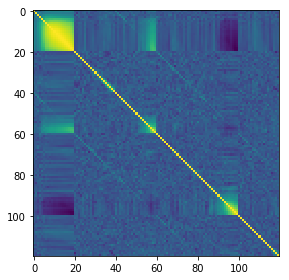

In [46]:
# file input :
path = './dvs/'



# *****************************
tau = 'tau__sw__JK_Y3_1.fits'
rho = 'rho__sw__JK_Y3_1.fits'


# *****************************
tau = 'tau__JK_Y3_1.fits'
rho = 'rho__JK_Y3_1.fits'
# *****************************
# *****************************
tau = 'tau__FLASK_Y3_1.fits'
tau = 'tau__JK_Y3_1.fits'
rho = 'rho__JK_Y3_1.fits'


tau = 'tau__sw__JK_Y3_1.fits'
rho = 'rho__sw__JK_Y3_1.fits'


# *****************************
tau = 'tau__FLASK_Y3_1.fits'
rho = 'rho__JK_Y3_1.fits'

tau = 'tau__sw__FLASK_Y3_1.fits'
rho = 'rho__sw__JK_Y3_1.fits'

#rho = 'rho_nomean_JK_Y3_1.fits'


minscale=0.1
maxscale=3000.

meanr, rhos,  covrho =  read_rhos(path+rho, minscale=minscale, maxscale=maxscale)
meanr, taus,  covtau =  read_taus(path+tau, minscale=minscale, maxscale=maxscale)
print meanr

taus[0]=taus[0]#-rho_dict['y3__pshuffle1_pv'][1]
taus[2]=taus[2]#-rho_dict['y3__qshuffle1_pv'][1]


data = {}
data['rhos'] = rhos
data['cov_rhos'] = covrho
data['taus'] = taus
data['cov_taus'] = covtau
i_guess = [ 0, 1, -1 ] #fiducial values


import copy
corrtau=copy.copy(covtau)*0.
for i in range(covtau.shape[0]):
    for j in range(covtau.shape[0]):
        corrtau[i,j] = covtau[i,j]/np.sqrt(covtau[i,i]*covtau[j,j])
plt.imshow(corrtau)


[ 2.19297074e-03  1.15540852e+00 -3.98860744e-04  7.80850637e-04
  1.07104205e-03  4.23558795e-05]
2.092663711849278
1.6577236155139623
2.6298995533433525
2.086612652481601


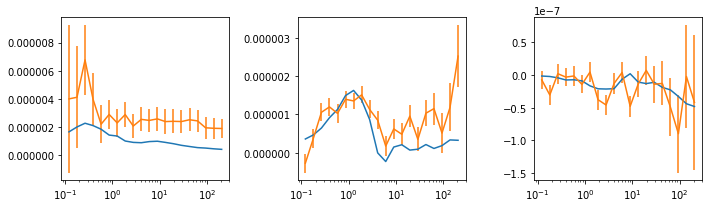

In [56]:
def chi2_new(params):

    a = params[0]
    b = params[1]
    c=params[2]
    ad1=params[3]
    ad2=params[4]
    ad3=params[5]
    

    ad1=0.
    ad2=0.
    ad3=0.
    maskp = [True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])
    maskm = [False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])

    thp = np.array([rhos[0]*a+rhos[4]*b+c*rhos[10],a*rhos[4]+b*rhos[2]+c*rhos[8],a*rhos[10]+b*rhos[8]+c*rhos[3]])
    thm = np.array([rhos[1]*a+rhos[5]*b+c*rhos[11],a*rhos[5]+b*rhos[3]+c*rhos[9],a*rhos[11]+b*rhos[9]+c*rhos[4]])
    th = np.array([thp[0]+ad1,thm[0],thp[1]+ad2,thm[1],thp[2]+ad3,thm[2]])
       
    dvp = np.array([taus[0],taus[2],taus[4]])
    dvm = np.array([taus[1],taus[3],taus[5]])
    covp =  covtau[maskp,:][:,maskp]
    covm =  covtau[maskm,:][:,maskm]
    
    
    # *********************
    x = dvp.flatten()-thp.flatten()
    chi2p = np.matmul(x,np.matmul(np.linalg.inv(covp),x))/len(x)
    # *********************
    x = dvm.flatten()-thm.flatten()
    chi2m = np.matmul(x,np.matmul(np.linalg.inv(covm),x))/len(x)
    # *********************
    yy=np.array(taus).flatten()
    x = yy-th.flatten()
    chi2 = np.matmul(x,np.matmul(np.linalg.inv(covtau),x))/len(x)
    #print (chi2p,chi2m,chi2)
    return chi2

def dv_plot(params):
    a = params[0]
    b = params[1]
    c=params[2]
    
    ad1=params[3]
    ad2=params[4]
    ad3=params[5]
    
    ad1=0.
    ad2=0.
    ad3=0.
    maskp = [True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])
    maskm = [False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])

    thp = np.array([rhos[0]*a+rhos[4]*b+c*rhos[10]+ad1,a*rhos[4]+b*rhos[2]+c*rhos[8]+ad2,a*rhos[10]+b*rhos[8]+c*rhos[3]+ad3])
    thm = np.array([rhos[1]*a+rhos[5]*b+c*rhos[11],a*rhos[5]+b*rhos[3]+c*rhos[9],a*rhos[11]+b*rhos[9]+c*rhos[4]])
    th = np.array([thp[0],thm[0],thp[1],thm[1],thp[2],thm[2]])
    
    dvp = np.array([taus[0],taus[2],taus[4]])
    dvm = np.array([taus[1],taus[3],taus[5]])
    dv=np.array(taus).flatten()
    ll = len(rhos[0])
    c1=np.sqrt(covtau[:ll,:][:,:ll].diagonal())
    c2=np.sqrt(covtau[2*ll:3*ll,:][:,2*ll:3*ll].diagonal())
    c3=np.sqrt(covtau[4*ll:5*ll,:][:,4*ll:5*ll].diagonal())
    errvp=np.array([c1,c2,c3])
    c1=(covtau[:ll,:][:,:ll])
    c2=(covtau[2*ll:3*ll,:][:,2*ll:3*ll])
    c3=(covtau[4*ll:5*ll,:][:,4*ll:5*ll])
    covp=np.array([c1,c2,c3])
    
    
    c1=np.sqrt(covtau[1*ll:2*ll,:][:,1*ll:2*ll].diagonal())
    c2=np.sqrt(covtau[3*ll:4*ll,:][:,3*ll:4*ll].diagonal())
    c3=np.sqrt(covtau[5*ll:6*ll,:][:,5*ll:6*ll].diagonal())
    errvm=np.array([c1,c2,c3])
    c1=(covtau[1*ll:2*ll,:][:,1*ll:2*ll])
    c2=(covtau[3*ll:4*ll,:][:,3*ll:4*ll])
    c3=(covtau[5*ll:6*ll,:][:,5*ll:6*ll])
    covm=np.array([c1,c2,c3])
    
    
    return thp,dvp,errvp,covp,thm,dvm,errvm,covm

i_guess = [ 0, 1, -1,0.,0.,0. ]
from scipy.optimize import minimize, rosen, rosen_der
res = minimize(chi2_new, i_guess, method='Nelder-Mead', tol=1e-3)
print res.x
print chi2_new(res.x)
fig, ax = plt.subplots(1,3,sharex = True, figsize=(10,3))
thp,dvp,errvp,covp,thm,dvm,errvm,covm=dv_plot(res.x)

ax[0].errorbar(meanr,thp[0])
ax[0].errorbar(meanr,dvp[0],errvp[0])
ax[1].errorbar(meanr,thp[1]*meanr)
ax[1].errorbar(meanr,dvp[1]*meanr,errvp[1]*meanr)
ax[2].errorbar(meanr,thp[2]*meanr)
ax[2].errorbar(meanr,dvp[2]*meanr,errvp[2]*meanr)

for i in range(3):
    xy = (dvp[i]-thp[i])
    print (np.matmul(xy,np.matmul(np.linalg.inv(covp[i]),xy))/len(xy))
plt.xscale('log')


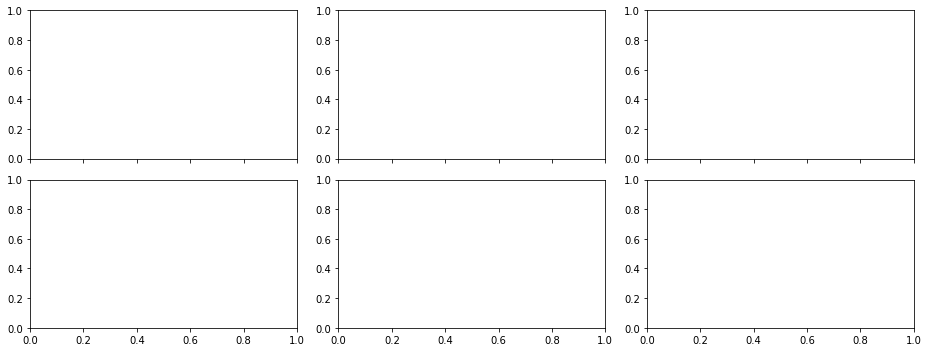

In [57]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

c_2=rgb_to_hex((239, 96, 96))
c_3=rgb_to_hex((55, 94, 50)) 
c_23=rgb_to_hex((121, 183, 179)) 
colors = [c_2,c_3,c_23]



fig, ax = plt.subplots(2,3,sharex = True, figsize=(13,5))


theta = meanr

values=[2.19297074e-03 , 1.15540852e+00 ,-3.98860744e-04 , 7.80850637e-04,
  1.07104205e-03 , 4.23558795e-05]
thp,dvp,errvp,covp,thm,dvm,errvm,covm=dv_plot(values)

dict_save['thp']=thp
dict_save['dvp']=dvp
dict_save['errvp']=errvp
dict_save['thm']=thm
dict_save['dvm']=dvm
dict_save['errvm']=errvm
dict_save['theta']=theta

save_obj('../../final_plots_paper/everything_you_need_for_ABE',dict_save)


# no alpha

[ 4.60487256e-05  1.15519176e+00 -5.09247124e-04  3.81693351e-04
  7.82808330e-04  1.07088241e-03]
1.8446678527201459
1.676157898774558
2.6221547351415895
1.1125980854476387


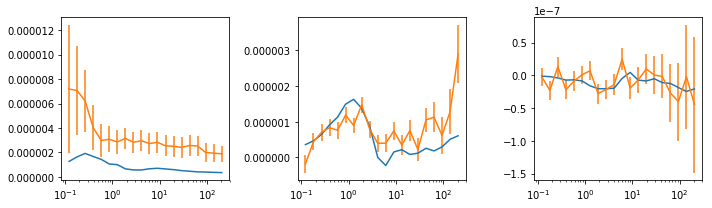

In [93]:
def chi2_new(params):

    a = params[0]
    b = params[1]
    c=params[2]
    ad1=params[3]
    ad2=params[4]
    ad3=params[5]
    

    ad1=0.
    ad2=0.
    ad3=0.
    maskp = [False]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])
    maskm = [False]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])

    thp = np.array([a*rhos[4]+b*rhos[2]+c*rhos[8],a*rhos[10]+b*rhos[8]+c*rhos[3]])
    thm = np.array([a*rhos[5]+b*rhos[3]+c*rhos[9],a*rhos[11]+b*rhos[9]+c*rhos[4]])
    th = np.array([thp[0],thm[0],thp[1]+ad2,thm[1]])
       
    dvp = np.array([taus[2],taus[4]])
    dvm = np.array([taus[3],taus[5]])
    covp =  covtau[maskp,:][:,maskp]
    covm =  covtau[maskm,:][:,maskm]
    
    
    # *********************
    x = dvp.flatten()-thp.flatten()
    chi2p = np.matmul(x,np.matmul(np.linalg.inv(covp),x))/len(x)
    # *********************
    x = dvm.flatten()-thm.flatten()
    chi2m = np.matmul(x,np.matmul(np.linalg.inv(covm),x))/len(x)
    # *********************
    yy=np.array(taus).flatten()
    x = yy[2*len(rhos[0]):]-th.flatten()
    chi2 = np.matmul(x,np.matmul(np.linalg.inv(covtau[:,2*len(rhos[0]):][2*len(rhos[0]):,:]),x))/len(x)
    #print (chi2p,chi2m,chi2)
    return chi2

def dv_plot(params):
    a = params[0]
    b = params[1]
    c=params[2]
    
    ad1=params[3]
    ad2=params[4]
    ad3=params[5]
    
    ad1=0.
    ad2=0.
    ad3=0.
    maskp = [True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])
    maskm = [False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])

    thp = np.array([rhos[0]*a+rhos[4]*b+c*rhos[10]+ad1,a*rhos[4]+b*rhos[2]+c*rhos[8]+ad2,a*rhos[10]+b*rhos[8]+c*rhos[3]+ad3])
    thm = np.array([rhos[1]*a+rhos[5]*b+c*rhos[11],a*rhos[5]+b*rhos[3]+c*rhos[9],a*rhos[11]+b*rhos[9]+c*rhos[4]])
    th = np.array([thp[0],thm[0],thp[1],thm[1]])
    
    dvp = np.array([taus[0],taus[2],taus[4]])
    dvm = np.array([taus[1],taus[3],taus[5]])
    dv=np.array(taus).flatten()
    ll = len(rhos[0])
    c1=np.sqrt(covtau[:ll,:][:,:ll].diagonal())
    c2=np.sqrt(covtau[2*ll:3*ll,:][:,2*ll:3*ll].diagonal())
    c3=np.sqrt(covtau[4*ll:5*ll,:][:,4*ll:5*ll].diagonal())
    errvp=np.array([c1,c2,c3])
    c1=(covtau[:ll,:][:,:ll])
    c2=(covtau[2*ll:3*ll,:][:,2*ll:3*ll])
    c3=(covtau[4*ll:5*ll,:][:,4*ll:5*ll])
    covp=np.array([c1,c2,c3])
    return thp,dvp,errvp,covp

i_guess = [ 0, 1, -1,0.,0.,0. ]
from scipy.optimize import minimize, rosen, rosen_der
res = minimize(chi2_new, i_guess, method='Nelder-Mead', tol=1e-3)
print res.x
print chi2_new(res.x)
fig, ax = plt.subplots(1,3,sharex = True, figsize=(10,3))
thp,dvp,errvp,covp=dv_plot(res.x)

ax[0].errorbar(meanr,thp[0])
ax[0].errorbar(meanr,dvp[0],errvp[0])
ax[1].errorbar(meanr,thp[1]*meanr)
ax[1].errorbar(meanr,dvp[1]*meanr,errvp[1]*meanr)
ax[2].errorbar(meanr,thp[2]*meanr)
ax[2].errorbar(meanr,dvp[2]*meanr,errvp[2]*meanr)

for i in range(3):
    xy = (dvp[i]-thp[i])
    print (np.matmul(xy,np.matmul(np.linalg.inv(covp[i]),xy))/len(xy))
plt.xscale('log')


[0.00754479 1.43325102 0.00578626]
2.3133215633477318


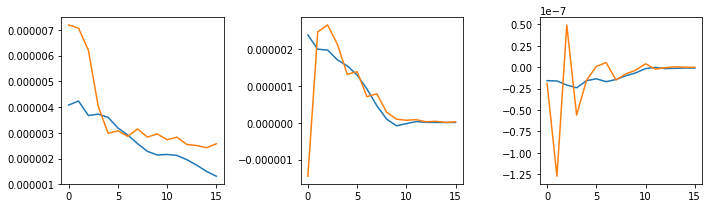

In [245]:
def chi2_new(params):

    a = params[0]
    b = params[1]
    c=params[2]
    
    maskp = [False]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])
    maskm = [False]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])

    thp = np.array([a*rhos[4]+b*rhos[2]+c*rhos[8],a*rhos[10]+b*rhos[8]+c*rhos[3]])
    thm = np.array([a*rhos[5]+b*rhos[3]+c*rhos[9],a*rhos[11]+b*rhos[9]+c*rhos[4]])
    th = np.array([thp[0],thm[0],thp[1],thm[1]])
       
    dvp = np.array([taus[2],taus[4]])
    dvm = np.array([taus[3],taus[5]])
    covp =  covtau[maskp,:][:,maskp]
    covm =  covtau[maskm,:][:,maskm]
    
    
    # *********************
    x = dvp.flatten()-thp.flatten()
    chi2p = np.matmul(x,np.matmul(np.linalg.inv(covp),x))/len(x)
    # *********************
    x = dvm.flatten()-thm.flatten()
    chi2m = np.matmul(x,np.matmul(np.linalg.inv(covm),x))/len(x)
    # *********************
    x = np.array(taus).flatten()[2*len(rhos[0]):]-th.flatten()
    chi2 = np.matmul(x,np.matmul(np.linalg.inv(covtau[:,2*len(rhos[0]):][2*len(rhos[0]):,:]),x))/len(x)
    #print (chi2p,chi2m,chi2)
    return chi2p

def dv_plot(params):
    a = params[0]
    b = params[1]
    c=params[2]
    
    maskp = [False]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])
    maskm = [False]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])

    thp = np.array([rhos[0]*a+rhos[4]*b+c*rhos[10],a*rhos[4]+b*rhos[2]+c*rhos[8],a*rhos[10]+b*rhos[8]+c*rhos[3]])
    thm = np.array([rhos[1]*a+rhos[5]*b+c*rhos[11],a*rhos[5]+b*rhos[3]+c*rhos[9],a*rhos[11]+b*rhos[9]+c*rhos[4]])
    th = np.array([thp[0],thm[0],thp[1],thm[1],thp[2],thm[2]])
    
    dvp = np.array([taus[0],taus[2],taus[4]])
    dvm = np.array([taus[1],taus[3],taus[5]])
    dv=np.array(taus).flatten()
    
    return thp,dvp

from scipy.optimize import minimize, rosen, rosen_der
res = minimize(chi2_new, i_guess, method='Nelder-Mead', tol=1e-3)
print res.x
print chi2_new(res.x)
fig, ax = plt.subplots(1,3,sharex = True, figsize=(10,3))
thp,dvp=dv_plot(res.x)

ax[0].plot(thp[0])
ax[0].plot(dvp[0])

ax[1].plot(thp[1])
ax[1].plot(dvp[1])

ax[2].plot(thp[2])
ax[2].plot(dvp[2])



[-2.61921544e-03  1.48819190e+00 -4.35812811e+01]
0.726008050278106


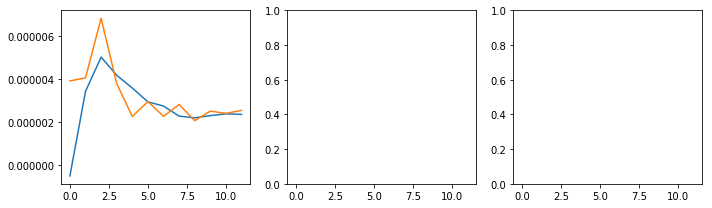

In [54]:
def chi2_new(params):

    a = params[0]
    b = params[1]
    c=params[2]
    
    maskp = [True]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])
    maskm = [False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])

    thp = np.array([rhos[0]*a+rhos[4]*b+c*rhos[10]])
    thm = np.array([rhos[1]*a+rhos[5]*b+c*rhos[11]])
    th = np.array([thp[0],thm[0]])
       
    dvp = np.array([taus[0]])
    dvm = np.array([taus[1]])
    covp =  covtau[maskp,:][:,maskp]
    covm =  covtau[maskm,:][:,maskm]
    
    
    # *********************
    x = dvp.flatten()-thp.flatten()
    chi2p = np.matmul(x,np.matmul(np.linalg.inv(covp),x))/len(x)
    # *********************
    x = dvm.flatten()-thm.flatten()
    chi2m = np.matmul(x,np.matmul(np.linalg.inv(covm),x))/len(x)
    # *********************
    x = np.array(taus).flatten()[:2*len(rhos[0])]-th.flatten()
    chi2 = np.matmul(x,np.matmul(np.linalg.inv(covtau[:,:2*len(rhos[0])][:2*len(rhos[0]),:]),x))/len(x)
    #print (chi2p,chi2m,chi2)
    return chi2

def dv_plot(params):
    a = params[0]
    b = params[1]
    c=params[2]
    
    maskp = [True]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])
    maskm = [False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[True]*len(rhos[0])+[False]*len(rhos[0])+[False]*len(rhos[0])

    thp = np.array([rhos[0]*a+rhos[4]*b+c*rhos[10],a*rhos[4]+b*rhos[2]+c*rhos[8],a*rhos[10]+b*rhos[8]+c*rhos[3]])
    thm = np.array([rhos[1]*a+rhos[5]*b+c*rhos[11],a*rhos[5]+b*rhos[3]+c*rhos[9],a*rhos[11]+b*rhos[9]+c*rhos[4]])
    th = np.array([thp[0],thm[0]])
    
    dvp = np.array([taus[0]])
    dvm = np.array([taus[1]])
    dv=np.array(taus).flatten()
    
    return thp,dvp

from scipy.optimize import minimize, rosen, rosen_der
i_guess = [ 0, 1, -1 ] 
res = minimize(chi2_new, i_guess, method='Nelder-Mead', tol=1e-3)
print res.x
print chi2_new(res.x)
fig, ax = plt.subplots(1,3,sharex = True, figsize=(10,3))
thp,dvp=dv_plot(res.x)

ax[0].plot(thp[0])
ax[0].plot(dvp[0])





# save_tau tomographic

In [ ]:
1

In [2]:
1

1

0
1
2
3


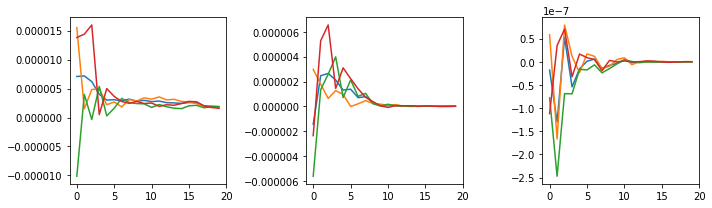

In [14]:
# check on them
fig, ax = plt.subplots(1,3,sharex = True, figsize=(10,3))
rrsF=["p","q","w"]
SW = True
if SW:
    rrs=["p","q","w"]
else:
    rrs=["p_sw","q_sw","w_sw"]
Arrs=["p","q","w"]
xx = 1
path = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_ABE_mastercat_04_20/final/'

hh=0
ataus = dict()
for hh in range(4):
    print hh
    for hg,rr in enumerate(rrs):
        tpv = []
        tmv = []
        tp = []
        tm = []

        # NO mean subtraction
        pathu = path+'/_{0}/y3__4thrun__{1}__4thrun__withweight'.format(hh,rr)
        muteaa = load_obj(pathu)
        #print (muteaa['high']["xip"])#/R[hh])
        ax[hg].plot(muteaa['high']["xip"])

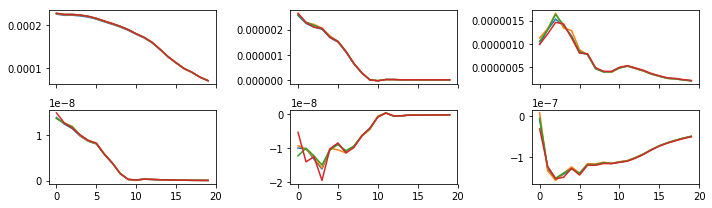

In [65]:
FLASK = False
SW = True

if SW:
    rrs=["rho0_sw","rho1_sw","rho2_sw","rho3_sw","rho4_sw","rho5_sw"]
else:
    rrs=["rho0","rho1","rho2","rho3","rho4","rho5"]

rrs2=["y3__rho0","y3__rho1","y3__rho2","y3__rho3","y3__rho4","y3__rho5"]

njck=1000
fig, ax = plt.subplots(2,3,sharex = True, figsize=(10,3))
for hh in range(0,4):
    Arrs=["rho0","rho1","rho2","rho3","rho4","rho5"] 
    ataus = dict()
    for hg,rr in enumerate(rrs):
        tpv = []
        tmv = []
        tp = []
        tm = []
        if hh==-1:
            pathu = path+'/_{0}/{1}__withweight'.format(hh,rrs2[hg])
        else:
            pathu = path+'/_{0}/y3__2ndrun__{1}__2ndrun__withweight'.format(hh,rr)
        muteaa = load_obj(pathu)

        #muteaa = load_obj(pathu)
        if hg==0:
            ax[0,0].plot(muteaa['high']["xip"])
        if hg==1:
            ax[0,1].plot(muteaa['high']["xip"])
        if hg==2:
            ax[0,2].plot(muteaa['high']["xip"])
        if hg==3:
            ax[1,0].plot(muteaa['high']["xip"])
        if hg==4:
            ax[1,1].plot(muteaa['high']["xip"])
        if hg==5:
            ax[1,2].plot(muteaa['high']["xip"])

In [12]:
ataus['p_m'].shape

(20, 1000)

In [2]:
# quick plots *******
path = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_ABE_mastercat_04_20/final/'



xx = 1


Arrs=["p","q","w"]


SW = True

if SW :
    rrs=["p_sw","q_sw","w_sw"]
    
else:
    rrs=["p","q","w"]

rrsF=["p","q","w"]
hh=0
ataus = dict()
for hh in range(1,5):
   
    for hg,rr in enumerate(rrs):
        tpv = []
        tmv = []
        tp = []
        tm = []



        # NO mean subtraction
        pathu = path+'/_{0}/y3__4thrun__{1}__4thrun__withweight'.format(hh,rr)
        muteaa = load_obj(pathu)
        tpv.append(muteaa['high']["xip"])#/R[hh])
        tmv.append(muteaa['high']["xim"])#/R[hh])
        tp.append(muteaa['high']["corr_jckp"].T)#/R[hh])
        tm.append(muteaa['high']["corr_jckm"].T)#/R[hh])
        ataus[Arrs[hg]+"_p"]=tp
        ataus[Arrs[hg]+"_m"]=tm     

        ataus[Arrs[hg]+"_pv"]=tpv
        ataus[Arrs[hg]+"_mv"]=tmv

        # FLASK ****************
        '''
        if FLASK:
            jhp = []
            jhm = []
            for jk in range(nrel):
                path=path_flask +"_{0}/y3_sm2__{1}_FLASKw_{2}__withweight".format(hh,rrsF[hg],jk)
                muteaa = load_obj(path)
                jhp.append(muteaa['high']["xip"])#/R[hh])
                jhm.append(muteaa['high']["xim"])#/R[hh]
            ataus[Arrs[hg]+"_p"]=np.array(jhp).T
            ataus[Arrs[hg]+"_m"]=np.array(jhm).T
        '''

    for key in ataus.keys():
        try:
            #

            #FLASK
            #if FLASK:
            #    ataus[key] = np.array(ataus[key]).reshape(20*xx,nrel)
            #    woa = covariance_jck(ataus[key],nrel,"bootstrap")
            #else:
            ataus[key] = np.array(ataus[key]).reshape(20*xx,1000)
            woa = covariance_jck(ataus[key],1000,"jackknife")

            #taus[key+"_cov"]=woa["cov"]
        except:
            ataus[key] = np.array(ataus[key]).reshape(20*xx)



    entries=['p_p','p_m','q_p','q_m','w_p','w_m']
    t = []
    #if FLASK:
    #    for entr in entries:
    ##        t.append(np.array(ataus[entr]).reshape(20*xx,300))
    #    t = np.array(t).reshape(6*np.array(t).shape[1],300)
    #    woa = covariance_jck(t,300,"bootstrap")      
    #else:
    for entr in entries:
        t.append(np.array(ataus[entr]).reshape(20*xx,1000))
    t = np.array(t).reshape(6*np.array(t).shape[1],1000)
    woa = covariance_jck(t,1000,"jackknife")


    from astropy.io import fits
    tau0marr = ataus["p_mv"]; tau2marr = ataus["q_mv"];  tau5marr = ataus["w_mv"];
    tau0parr = ataus["p_pv"]; tau2parr = ataus["q_pv"];  tau5parr = ataus["w_pv"];
    taus = [tau0parr, tau0marr, tau2parr, tau2marr, tau5parr, tau5marr]
    taus_names = ['TAU0P', 'TAU0M','TAU2P','TAU2M', 'TAU5P', 'TAU5M']
    ##Format of the fit file output



    names=['BIN1', 'BIN2','ANGBIN', 'VALUE', 'ANG']
    forms = ['i4', 'i4', 'i4',  'f4',  'f4']
    dtype = dict(names = names, formats=forms)
    nrows = len(tau0marr)
    outdata = np.recarray((nrows, ), dtype=dtype)
    covmat = woa["cov"]
    hdu = fits.PrimaryHDU()
    hdul = fits.HDUList([hdu])
    covmathdu = fits.ImageHDU(covmat, name='COVMAT')
    hdul.insert(1, covmathdu)
    zbin=1
    bin1array = np.array([ zbin]*nrows)
    bin2array = np.array([ -999]*nrows)
    angbinarray = np.arange(nrows)


    angarray = np.array([muteaa['high']["theta"]*60.]*xx).reshape(xx*20)
    for j, nam in enumerate(taus_names):
       outdata = np.recarray((nrows, ), dtype=dtype)
       array_list = [bin1array, bin2array, angbinarray,np.array(taus[j]),  angarray ]
       for array, name in zip(array_list, names): outdata[name] = array

       corrhdu = fits.BinTableHDU(outdata, name=nam)
       hdul.insert(j+2, corrhdu)
    hdul[1].header['COVDATA'] = True
    hdul[1].header['EXTNAME'] =  'COVMAT'
    hdul[1].header['NAME_0'] =  'TAU0'
    hdul[1].header['STRT_0'] =  0
    hdul[1].header['LEN_0'] = nrows
    hdul[1].header['NAME_1'] =  'TAU2'
    hdul[1].header['STRT_1'] =  nrows
    hdul[1].header['LEN_1'] = nrows
    hdul[1].header['NAME_2'] =  'TAU5'
    hdul[1].header['STRT_2'] =  2*nrows
    hdul[1].header['LEN_2'] = nrows
    hdul[2].header['QUANT1'] = 'GeR'; hdul[3].header['QUANT1'] = 'GeR'
    hdul[2].header['QUANT2'] = 'PeR'; hdul[3].header['QUANT2'] = 'PeR'
    hdul[4].header['QUANT1'] = 'GeR'; hdul[5].header['QUANT1'] = 'GeR'
    hdul[4].header['QUANT2'] = 'PqR'; hdul[5].header['QUANT2'] = 'PqR'
    hdul[6].header['QUANT1'] = 'GeR'; hdul[7].header['QUANT1'] = 'GeR'
    hdul[6].header['QUANT2'] = 'PwR'; hdul[7].header['QUANT2'] = 'PwR'

    if SW:
        sw_label = '_sw_'
    else:
        sw_label = ''
   # if FLASK:
#
#        if os.path.exists("./dvs/" + 'tau_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label)):
#            os.remove("./dvs/"+ 'tau_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label))
#        outname = os.path.join("./dvs/", 'tau_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label))
#        hdul.writeto(outname, overwrite=True)

    #else:
    if os.path.exists("./dvs/" + 'tau_{1}_JK_Y3_tomobin_{0}.fits'.format(hh,sw_label)):
        os.remove("./dvs/"+ 'tau_{1}_JK_Y3_tomobin_{0}.fits'.format(hh,sw_label))
    outname = os.path.join("./dvs/", 'tau_{1}_JK_Y3_tomobin_{0}.fits'.format(hh,sw_label))
    hdul.writeto(outname, overwrite=True)

print ("done")

done


In [7]:
m = load_obj('runs_path_ABE_y3')

In [3]:
rm -r cross_corr_truez_higherlum_v2_Y3a_large_scales/pairscount/dataset.h
rm -r cross_corr_truez_higherlum_v2_Y3a/pairscount/dataset.h
rm -r cross_corr_truez_eboss_v2_Y3a_large_scales/pairscount/dataset.h
rm -r cross_corr_truez_eboss_v2_Y3a/pairscount/dataset.h
rm -r cross_corr_truez_combined_v2_Y3a_large_scales/pairscount/dataset.h
rm -r cross_corr_truez_combined_v2_Y3a/pairscount/dataset.h
rm -r cross_corr_rmgz_higherlum_v2_Y3a/pairscount/dataset.h
rm -r cross_corr_rmgz_combined_v2_Y3a/pairscount/dataset.h


1

In [34]:
FLASK = False
SW = False


if SW:
    rrs=["rho0_sw","rho1_sw","rho2_sw","rho3_sw","rho4_sw","rho5_sw"]
else:
    rrs=["rho0","rho1","rho2","rho3","rho4","rho5"]
njck=1000
    
for hh in range(1,5):
    
    
    Arrs=["rho0","rho1","rho2","rho3","rho4","rho5"] 

    ataus = dict()
    for hg,rr in enumerate(rrs):
        tpv = []
        tmv = []
        tp = []
        tm = []

        pathu =  path+'/_{0}/y3__2ndrun__{1}__2ndrun__withweight'.format(hh,rr)
        muteaa = load_obj(pathu)

        muteaa = load_obj(pathu)
        tpv.append(muteaa['high']["xip"])#/R[hh])
        tmv.append(muteaa['high']["xim"])#/R[hh])
        tp.append(muteaa['high']["corr_jckp"].T)#/R[hh])
        tm.append(muteaa['high']["corr_jckm"].T)#/R[hh])
        ataus[Arrs[hg]+"_pv"]=tpv
        ataus[Arrs[hg]+"_mv"]=tmv
        ataus[Arrs[hg]+"_p"]=tp
        ataus[Arrs[hg]+"_m"]=tm
    for key in ataus.keys():
        try:
            ataus[key] = np.array(ataus[key]).reshape(20*xx,njck)
            woa = covariance_jck(ataus[key],njck,"jackknife")
            #taus[key+"_cov"]=woa["cov"]
        except:
            ataus[key] = np.array(ataus[key]).reshape(20*xx)
    entries=["rho0_p","rho0_m","rho1_p","rho1_m","rho2_p","rho2_m","rho3_p","rho3_m","rho4_p","rho4_m","rho5_p","rho5_m"]











    t = []
    for entr in entries:
        t.append(np.array(ataus[entr]).reshape(20*xx,njck))
    t = np.array(t).reshape(12*np.array(t).shape[1],njck)
    woa = covariance_jck(t,njck,"jackknife")


    from astropy.io import fits

    taus = [ataus["rho0_pv"], ataus["rho0_mv"], ataus["rho1_pv"],ataus["rho1_mv"],ataus["rho2_pv"],ataus["rho2_mv"],ataus["rho3_pv"],ataus["rho3_mv"],ataus["rho4_pv"],ataus["rho4_mv"],ataus["rho5_pv"],ataus["rho5_mv"]]
    taus_names = ['RHO0P', 'RHO0M','RHO1P','RHO1M','RHO2P','RHO2M','RHO3P','RHO3M', 'RHO4P','RHO4M', 'RHO5P', 'RHO5M']
    ##Format of the fit file output



    names=['BIN1', 'BIN2','ANGBIN', 'VALUE', 'ANG']
    forms = ['i4', 'i4', 'i4',  'f4',  'f4']
    dtype = dict(names = names, formats=forms)
    nrows = len(ataus["rho0_pv"])
    outdata = np.recarray((nrows, ), dtype=dtype)
    covmat = woa["cov"]
    hdu = fits.PrimaryHDU()
    hdul = fits.HDUList([hdu])
    covmathdu = fits.ImageHDU(covmat, name='COVMAT')
    hdul.insert(1, covmathdu)
    zbin=1
    bin1array = np.array([ zbin]*nrows)
    bin2array = np.array([ -999]*nrows)
    angbinarray = np.arange(nrows)


    angarray = np.array([muteaa['high']["theta"]*60.]*xx).reshape(xx*20)
    for j, nam in enumerate(taus_names):
       outdata = np.recarray((nrows, ), dtype=dtype)
       array_list = [bin1array, bin2array, angbinarray,np.array(taus[j]),  angarray ]
       for array, name in zip(array_list, names): outdata[name] = array

       corrhdu = fits.BinTableHDU(outdata, name=nam)
       hdul.insert(j+2, corrhdu)
    hdul[1].header['COVDATA'] = True
    hdul[1].header['EXTNAME'] =  'COVMAT'
    hdul[1].header['NAME_0'] =  'RHO0'
    hdul[1].header['STRT_0'] =  0
    hdul[1].header['LEN_0'] = nrows
    hdul[1].header['NAME_1'] =  'RHO1'
    hdul[1].header['STRT_1'] =  nrows
    hdul[1].header['LEN_1'] = nrows
    hdul[1].header['NAME_2'] =  'RHO2'
    hdul[1].header['STRT_2'] =  2*nrows
    hdul[1].header['LEN_2'] = nrows
    hdul[1].header['NAME_3'] =  'RHO3'
    hdul[1].header['STRT_3'] =  3*nrows
    hdul[1].header['LEN_3'] = nrows
    hdul[1].header['NAME_4'] =  'RHO4'
    hdul[1].header['STRT_4'] =  4*nrows
    hdul[1].header['LEN_4'] = nrows
    hdul[1].header['NAME_5'] =  'RHO5'
    hdul[1].header['STRT_5'] =  5*nrows
    hdul[1].header['LEN_5'] = nrows
    hdul[2].header['QUANT1'] = 'GeR'; hdul[3].header['QUANT1'] = 'GeR'
    hdul[2].header['QUANT2'] = 'PeR'; hdul[3].header['QUANT2'] = 'PeR'
    hdul[4].header['QUANT1'] = 'GeR'; hdul[5].header['QUANT1'] = 'GeR'
    hdul[4].header['QUANT2'] = 'PqR'; hdul[5].header['QUANT2'] = 'PqR'
    hdul[6].header['QUANT1'] = 'GeR'; hdul[7].header['QUANT1'] = 'GeR'
    hdul[6].header['QUANT2'] = 'PwR'; hdul[7].header['QUANT2'] = 'PwR'


    
    if SW:
        sw_label = '_sw_'
    else:
        sw_label = ''



    if os.path.exists("./dvs/" + 'rho_{1}_JK_Y3_tomobin_{0}.fits'.format(hh,sw_label)):
        os.remove("./dvs/"+ 'rho_{1}__JK_Y3_tomobin_{0}.fits'.format(hh,sw_label))
    outname = os.path.join("./dvs/", 'rho_{1}__JK_Y3_tomobin_{0}.fits'.format(hh,sw_label))
    hdul.writeto(outname, overwrite=True)

print ("done")

done


In [33]:
1

1

In [58]:
1

1